In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


/home/akiyama/.conda/envs/base310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9912422/9912422 [00:08<00:00, 1177881.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 10398806.23it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1783047.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9587583.68it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/10, Training Loss: 0.4112
Epoch 2/10, Training Loss: 0.1916
Epoch 3/10, Training Loss: 0.1414
Epoch 4/10, Training Loss: 0.1134
Epoch 5/10, Training Loss: 0.0974
Epoch 6/10, Training Loss: 0.0851
Epoch 7/10, Training Loss: 0.0761
Epoch 8/10, Training Loss: 0.0706
Epoch 9/10, Training Loss: 0.0648
Epoch 10/10, Training Loss: 0.0590


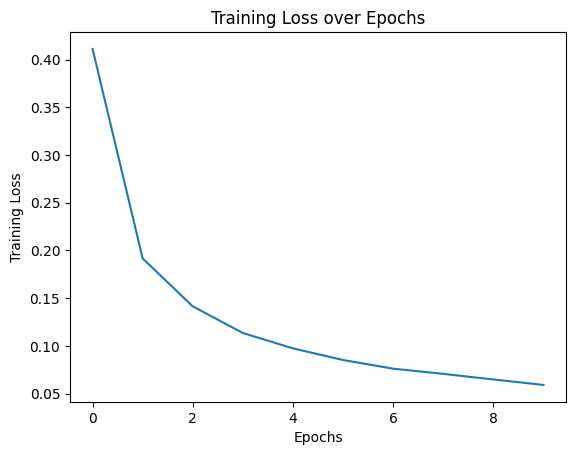

In [7]:
epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")


Accuracy on test set: 96.96%


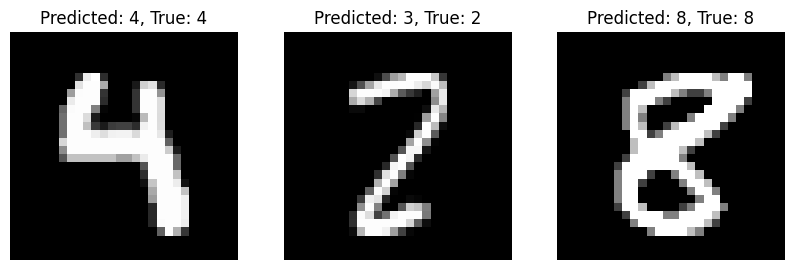

In [9]:
import numpy as np

model.eval()

with torch.no_grad():
    outputs = model(test_dataset.data.float())
    _, predicted_labels = torch.max(outputs, 1)

test_images_np = test_dataset.data.numpy()
test_labels_np = test_dataset.targets.numpy()
predicted_labels_np = predicted_labels.numpy()

plt.figure(figsize=(10, 5))
for i in range(3):
    index = np.random.randint(0, len(test_images_np))
    image = test_images_np[index]
    plt.subplot(1, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_labels_np[index]}, True: {test_labels_np[index]}")
    plt.axis('off')
plt.show()